<font size = "5"> **Day 3: [Energy Dispersive X-Ray Spectroscopy, Principal Component Analysis, and Non-
Negative Matrix Factorization](../MLSTEM2024.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

[Download](https://raw.githubusercontent.com/gduscher/MLSTEM2024//main/Day3/1_Introduction_EDS.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MLSTEM2024/blob/main/Day3/1_Introduction_EDS.ipynb)


# Introduction to Energy-Dipserive X-Ray Spectroscopy
Lecturer: Gerd Duscher

part of the workshop of 

<font size = "5"> **[Machine Learning in Scanning Transmission Electron Microscopy](../_MLSTEM.ipynb)**</font>


**Day3: Energy Dispersive X-Ray Spectroscopy, Principal Component Analysis, and Non-
Negative Matrix Factorization**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Sergei Kalinin</td>
  </tr>
  <tr>
    <td colspan="2"><center>Microscopy Facilities</td> 
  </tr>
  
  <tr>
    <td colspan="2"><center>Materials Science & Engineering</td>
    <td></td>
  </tr>
  <tr>
    <td colspan="2"><center>Institute of Advanced Materials & Manufacturing</td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>
        
**June 2024**

## Overview
We explore all the different contributions to an EDS spectrum 

This is a prerequisite for identifying and analyzing EDS spectra.


## Load packages
### Check for Newest Versions

## Load relevant python packages
### Check Installed Packages

In [1]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.2.3':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q

print('done')

installing pyTEMlib
done


### Load the plotting and figure packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,
* three dimensional plotting
and some libraries from the book
* kinematic scattering library.

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
if 'google.colab' in sys.modules:
    from google.colab import output
    from google.colab import drive
    output.enable_custom_widget_manager()

from pyTEMlib.xrpa_x_sections import x_sections
__notebook__ = '1-Introduction_X_Rays'
__notebook_version__ = '2023_01_22'


## Inelastic Scattering:

When a high energy electron collides with matter there are several process going on:

![inelastic_scattering](images/inelastic.jpg)


In an TEM and SEM there are quite a few inelastic signals available:
- Secondary electrons
- X-Rays
- Auger electrons
- Light (photons in visible range)

## X-Rays
Here we consider only X-Rays and Auger Electrons as those originate from competing processes:
![X-Ray_Auger](./images/X-Ray_Auger.jpg)

The excited atom has two possibilities to return to the ground state:

We consider the energy before and after the relaxation process.
### X-Ray branch 
The emitted photon has the energy of the energy gained in the relaxtion process. In the carbon atom case above, an electron from the 2p states relaxes to the *1s* state: from the L$_3$ to the K shell.

The energy difference of a  photon is the $E_K$ - $E_L$, which is well in the X-ray range.

*Please note that the transition from 2s to 1s is dipole forbidden and cannot occur.*

### Auger  branch 
The emitted electron leaves behind an atom with a closed K shell ($-E_K$) and looses two 2p electrons ($+2 E_L$. This energy will be transfered to the Auger electron as kinetic energy $ E_{kin} = E_K-2E_L$

In [4]:
## 
E_K = 284 # in eV
E_L = 7   # in eV

print(f'X-ray photon has the energy {E_K-E_L} eV')
print(f'Auger electron has the kinetic energy {E_K-2* E_L} eV')

X-ray photon has the energy 277 eV
Auger electron has the kinetic energy 270 eV


## Fluorescent Yield

The Auger and X-ray branches are not equally probable. In the carbon atom characteristic X-ray emission occurs at about 26% of the K-shell ionization. 

The fraction that of the ionization that *yields* photons is called **fluorescent yield** $\omega$. 

The fluorescent yield is strongly dependent on the atomic number [E.A. Preoteasa et al. 2012 – ISBN 978-1-61470-208-5]:

![fluorescentYield](images/fluorescenceYield3.png)

The fluorescent yield follows approximatively an equation  of the form:

$$ \omega = \frac{Z^4}{\alpha+Z^4} $$
with 
- $Z$: atomic number
- $\alpha$: constant about 10$^6$ for K lines

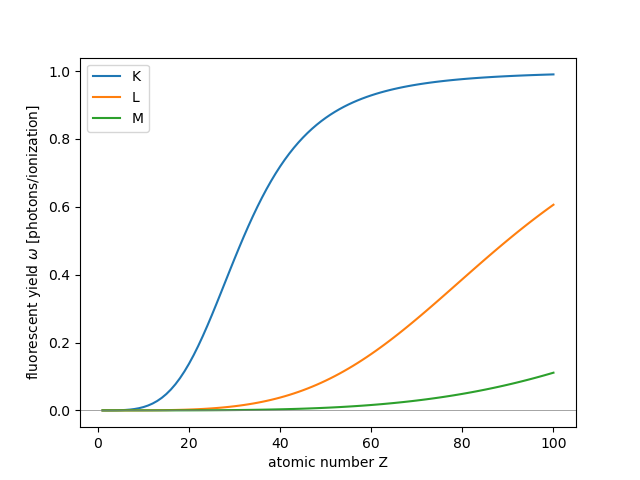

In [5]:
Z =  np.linspace(1,100,100)

alpha_K = 1e6
alpha_L = 6.5e7
alpha_M = 8*1e8#2.2e10
omega_K = Z**4/(alpha_K+Z**4)
omega_L = Z**4/(alpha_L+Z**4)
omega_M = Z**4/(alpha_M+Z**4)

plt.figure()
plt.plot(Z,omega_K, label='K')
plt.plot(Z,omega_L, label='L')
plt.plot(Z,omega_M, label='M')
plt.legend()
plt.xlabel('atomic number Z')
plt.ylabel('fluorescent yield $\omega$ [photons/ionization]')
plt.axhline(y=0., color='gray', linewidth=0.5);

## uncomment lines below for log scale 
# plt.gca().set_yscale('log')
# plt.ylim(1e-4, 0.9)

### Comparison

The data and formula agree quite well given the simplicty of the model.



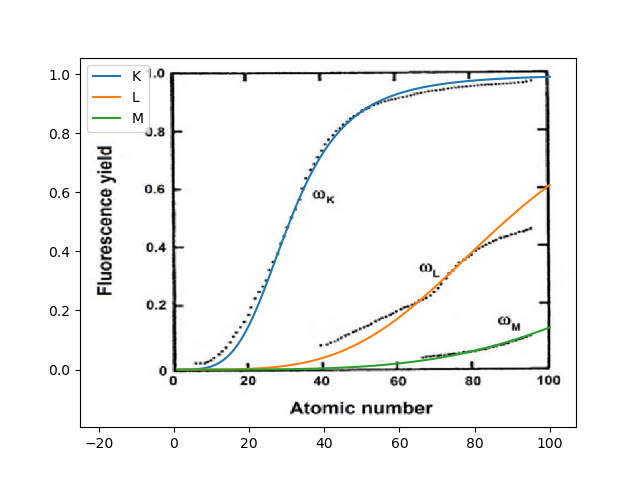

In [6]:
fname = './images/fluorescenceYield3.png'
im = plt.imread(fname)
Z =  np.linspace(1,100,100)

alpha_K = .9e6
alpha_L = 6.e7
alpha_M = 6*1e8#2.2e10
omega_K = Z**4/(alpha_K+Z**4)
omega_L = Z**4/(alpha_L+Z**4)
omega_M = Z**4/(alpha_M+Z**4)


plt.figure()

plt.imshow(im, cmap = 'gray', extent = (-25, 107,-.195,1.056))
plt.plot(Z,omega_K, label='K')
plt.plot(Z,omega_L, label='L')
plt.plot(Z,omega_M, label='M')
plt.legend()

plt.gca().set_aspect('auto')
#plt.axhline(y=0., color='gray', linewidth=0.5);
#plt.axhline(y=1., color='gray', linewidth=0.5);
#plt.axvline(x=0., color='gray', linewidth=0.5);
#plt.axvline(x=100., color='gray', linewidth=0.5);


In [7]:
8**4/(alpha_K+8**4)

0.0045304923370969455

## Energy Dispersive Spectrum


An energy dispersive X-ray spectrum (EDS)contains two different parts:
- [Characteristic X-ray peaks](./CH4_14-Characteristic_X_Rays.ipynb)
- [Bremsstrahlung](./CH4_13-Bremsstrahlung.ipynb)
    
![Spectrum](images/Spectrum.png)    


The Bremsstrahlung causes the background the characteristic X-ray peaks are sitting on.

## Bremsstrahlung
The Bremsstrahlung causes the background the characteristic X-ray peaks are sitting on.


Because of the repulsion a fast electron by the negative electron cloud in a solid. such an electron will be de-accelerated or deflected. Any acceleration (negative or positive) is related with a photon (possibly only as an exchagne particle which is the basis of Quantum Eletrodynamics).

![X-Ray_Auger](./images/Bremsstrahlung1.jpg)

The energy loss in the braking of an electron will cause the emission of Bremsstrahlung (braking radiation). The energy of the photon of this electromagnetic radiation is directly the photon energy.

Thus the Bremsstrahlung spans the energies from the incident electron's energy down to a practical limit of about 100eV. The Bremsstrahlung is therefore sometimes refered to as X-ray continuum.



The Bremsstrahlung is anoistropic, peaked in the forwad direction of the incident electron.



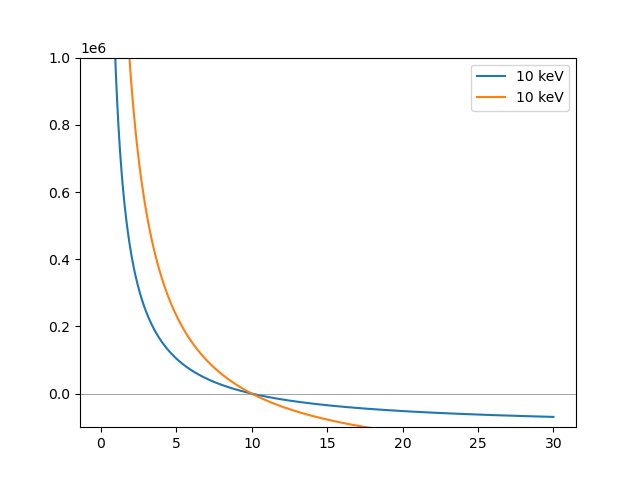

In [8]:
Z = 26
E_0 = 10 # keV

K = -4000
I = 1

E = energy_scale = np.linspace(.1,30,2048) #in keV
N_E = I*K*Z*(E-E_0)/E

Z2 = 58
E_02 = 10 # keV
N_E2 = I*K*Z2*(E-E_02)/E

plt.figure()
plt.plot(energy_scale, N_E, label= f'{E_0} keV');
plt.plot(energy_scale, N_E2, label= f'{E_02} keV');
plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5)
plt.ylim( -1e5, 1e6)
plt.legend();

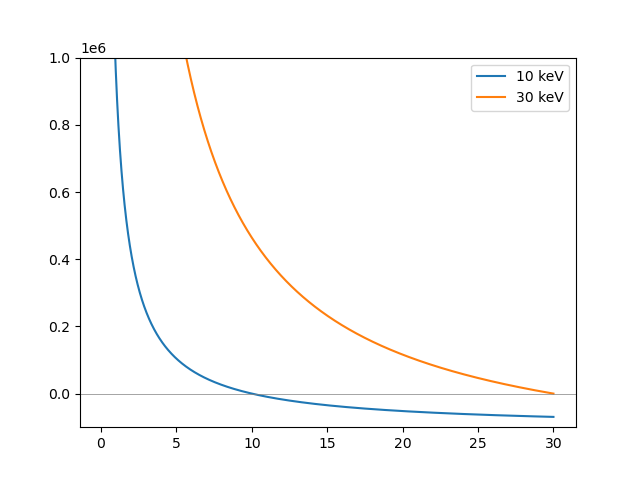

In [9]:
Z = 26
E_0 = 10 # keV

K = -4000
I = 1

E = energy_scale = np.linspace(.1,30,2048) #in keV
N_E = I*K*Z*(E-E_0)/E

Z2 = 58
E_02 = 30 # keV
N_E2 = I*K*Z2*(E-E_02)/E

plt.figure()
plt.plot(energy_scale, N_E, label= f'{E_0} keV');
plt.plot(energy_scale, N_E2, label= f'{E_02} keV');
plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5)
plt.ylim( -1e5, 1e6)
plt.legend();

### Bremsstrahlung and EDS Background

At low energies,  this background above does not look anything like the background we obtain in the EDS spectrum.

This is due to the  response of the EDS detector system

![X-Ray_Auger](images/DetectorEfficiency.png).

## Detector Efficiency
### Photoabsorption 
If we only look at the crystal we see that we have a contact and the Silicon crystal. However there is also a thin deadlayer on the top of the crystal that will absorb X-rays without detecting it.
We will talk more about detectors in the **EDS resolution section**

Detection and wekening of the signal through absorption are both governed by photoabsorption cross section.

The mass absorption coefficiencts  $ \mu/ \rho$ (a function of energy) are taken from the [Mass Absorption Coefficients from NIST](https://physics.nist.gov/PhysRefData/FFast/html/form.html)

Select the element and as *Type of Data* select **Mass Photoabsorption Coefficient (cm^2/g)**

I collected all the data in a pickled dictionary which we open below and then test the content.


Edges of Si:
M2 :  0.005 keV
M1 :  0.011 keV
L3 :  0.099 keV
L2 :  0.099 keV
L1 :  0.149 keV
K1 :  1.839 keV


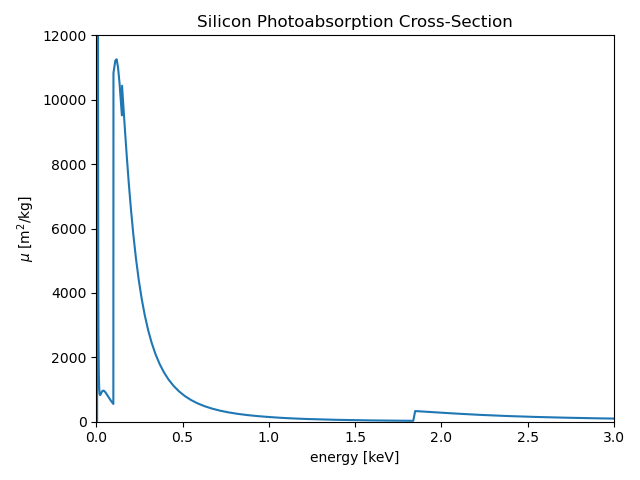

In [10]:
shell_occupancy={'K1':2, 'L1':2, 'L2':2, 'L3':4, 'M1':2, 'M2':2, 'M3':4,'M4':4,'M5':6, 
                        'N1':2, 'N2':2,' N3':4,'N4':4,'N5':6, 'N6':6,'N7':8,
                        'O1':2, 'O2':2,' O3':4,'O4':4,'O5':6, 'O6':6,'O7':8, 'O8':8, 'O9': 10 }

Z = 14
print(f"Edges of {x_sections[str(Z)]['name']}:")
for key in x_sections[str(Z)]:
    if key in shell_occupancy.keys():
      print(f"{key:3s}:  {x_sections[str(Z)][key]['onset']/1e3:.3f} keV")
plt.figure()
plt.plot( x_sections[str(Z)]['ene']/1000., x_sections[str(Z)]['dat']/x_sections[str(Z)]['photoabs_to_sigma']/1e10*0.1)
plt.xlim(0,3)

plt.ylim(0,1.2e4)
            
plt.xlabel('energy [keV]')
plt.ylabel('$\mu$ [m$^2$/kg]')
plt.title('Silicon Photoabsorption Cross-Section')
plt.tight_layout();

### Absorption
Absorption probability $P(E)$ is related t the mass aborption coefficient  with:

$$ P(E) = I/I_0 =\exp\left[ -(\mu/\rho) * \rho * t\right] = \exp\left[ -\mu* t\right]$$

with
- $I_0$: initial intensity of X-rays
- $I$:  intensity of X-rays after going through thickness $t$
- $\rho$: density of material 
 
### Detector 

The detector response $P_D$ is given by Small et al. as:
Here, we assume the contact to be Al and the dead layer is of course Si like the detector crystal:

$$ \Large 
\begin{align}
P_D = &(\exp(\mu_{Al}(E) *t_{Al} *\rho_{Al})) * (\exp(\mu_{Si}(E) *t_{dead layer} *\varrho_{Si} )) \\
&\times (1- \exp(\mu_{Si}(E) *t_{detector} *\varrho_{Si} ))
\end{align} $$

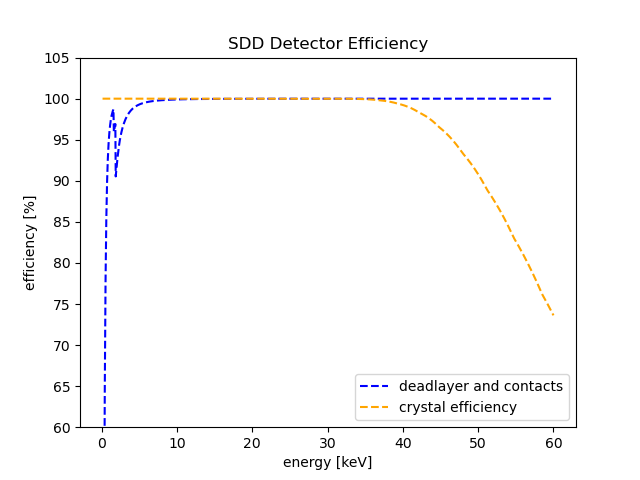

In [11]:
from scipy.interpolate import interp1d
import scipy.constants as const


## layer thicknesses of commen materials in EDS detectors in m
nickelLayer = 0.* 1e-9 # in m
alLayer = 30 *1e-9    # in m
goldLayer = 0.* 1e-9   # in m
deadLayer = 100 *1e-9  # in m
detector_thickness = 45 * 1e-3  # in m

area = 30 * 1e-6 #in m2
oo4pi = 1.0 # / (4.0 * np.pi)* np.radians(10)*2

#We make a linear energy scale 
energy_scale = np.linspace(.1,60,1199)*1000


## interpolate mass absorption coefficient to our energy scale
photoabsorption = x_sections['14']['dat']/1e10/x_sections['14']['photoabs_to_sigma']
lin = interp1d(x_sections['14']['ene'], photoabsorption,kind='linear') 
mu_Si = lin(energy_scale) * x_sections['14']['nominal_density']*100. #1/cm -> 1/m

## interpolate mass absorption coefficient to our energy scale

photoabsorption = x_sections['13']['dat']/1e10/x_sections['13']['photoabs_to_sigma']
lin = interp1d(x_sections['13']['ene'], photoabsorption,kind='linear') 
mu_Al = lin(energy_scale) * x_sections['13']['nominal_density']*100. #1/cm -> 1/m

 
detector_Efficiency1 = np.exp(-mu_Al * alLayer)* np.exp(-mu_Si * deadLayer)  * oo4pi
detector_Efficiency2 = (1.0 - np.exp(-mu_Si * detector_thickness)) * oo4pi;
detector_Efficiency =detector_Efficiency1 * detector_Efficiency2/  oo4pi;


plt.figure()
#plt.plot(energy_scale/1000, detector_Efficiency*100, label = 'detector efficieny', color = 'red')
plt.plot(energy_scale/1000, detector_Efficiency1*100, '--', label = 'deadlayer and contacts', color = 'blue')
plt.plot(energy_scale/1000, detector_Efficiency2*100, '--',label = 'crystal efficiency' , color = 'orange')
plt.xlabel('energy [keV]')
plt.ylabel('efficiency [%]')
plt.title('SDD Detector Efficiency')
plt.ylim(60,105)
plt.legend();

### Effective Background

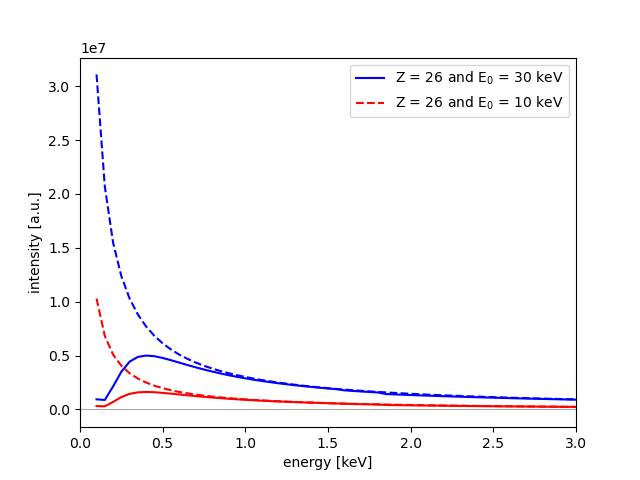

In [12]:
Z = 26
E_0 = 30 # keV

Z2 = 26
E_02 = 10


K = -4000
I = 1
E = energy_scale/1000 #= np.linspace(.1,30,2048) #in keV

N_E = I*K*Z*(E-E_0)/E
N_E2 = I*K*Z2*(E-E_02)/E

plt.figure()
plt.plot(energy_scale/1000, N_E, '--', color = 'blue');
plt.plot(energy_scale/1000, N_E*detector_Efficiency , color = 'blue', label = f'Z = {Z} and E$_0$ = {E_0} keV');
plt.plot(energy_scale/1000, N_E2, '--', color = 'red', label = f'Z = {Z2} and E$_0$ = {E_02} keV');
plt.plot(energy_scale/1000, N_E2*detector_Efficiency,  color = 'red');
plt.axhline(y=0., color='gray', linestyle='-', linewidth = 0.5);
plt.xlim(0,3)
plt.legend();

plt.ylabel('intensity [a.u.]')
plt.xlabel('energy [keV]');

### Now we put all of that together

and make a function:

The input is in the form of a dictionary.

We note that we have several layers that reduce the efficiency and that the thickness of the detector crystal itself has to be chosen appropriatly by the manufacturer.

Text(0.5, 0, 'energy (keV)')

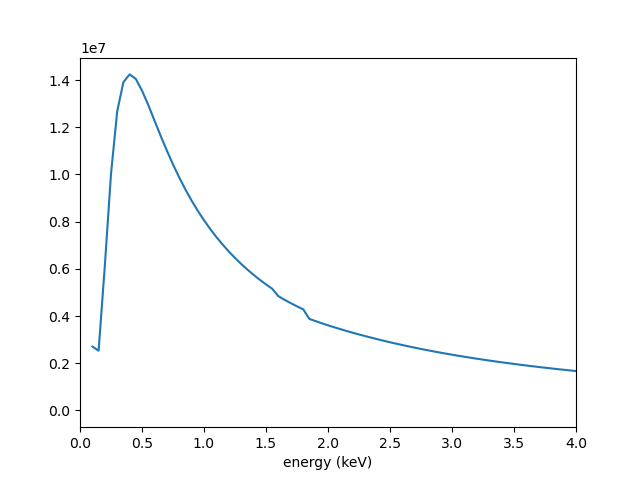

In [14]:
energy_scale = np.linspace(.1,60,1199)*1000

tags = {}

tags['acceleration_voltage_V'] = 30000

tags['detector'] ={}
tags['detector']['layers'] ={}

## layer thicknesses of commen materials in EDS detectors in m
tags['detector']['layers']['alLayer'] = {}
tags['detector']['layers']['alLayer']['thickness'] = 30 *1e-9    # in m
tags['detector']['layers']['alLayer']['Z'] = 13

tags['detector']['layers']['deadLayer'] = {}
tags['detector']['layers']['deadLayer']['thickness'] =  100 *1e-9  # in m
tags['detector']['layers']['deadLayer']['Z'] = 14

tags['detector']['layers']['window'] = {}
tags['detector']['layers']['window']['thickness'] =  0.0 *1e-9  # in m
tags['detector']['layers']['window']['Z'] = 6

tags['detector']['detector'] = {}
tags['detector']['detector']['thickness'] = 45 * 1e-3  # in m
tags['detector']['detector']['Z'] = 14
tags['detector']['detector']['area'] = 30 * 1e-6 #in m2
## interpolate mass absorption coefficient to our energy scale


def detector_response(detector_definition,energy_scale):
    response = np.ones(len(energy_scale))
    for key in detector_definition['layers']:
        Z = detector_definition['layers'][key]['Z']
        t = detector_definition['layers'][key]['thickness']
        photoabsorption = x_sections[str(Z)]['dat']/1e10/x_sections[str(Z)]['photoabs_to_sigma']
        lin = interp1d(x_sections[str(Z)]['ene'], photoabsorption,kind='linear') 
        mu = lin(energy_scale) * x_sections[str(Z)]['nominal_density']*100. #1/cm -> 1/m

        absorption = np.exp(-mu * t)
        response = response*absorption
    Z = detector_definition['detector']['Z']
    t = detector_definition['detector']['thickness']    
    photoabsorption = x_sections[str(Z)]['dat']/1e10/x_sections[str(Z)]['photoabs_to_sigma']
    lin = interp1d(x_sections[str(Z)]['ene'], photoabsorption,kind='linear') 
    mu = lin(energy_scale) * x_sections[str(Z)]['nominal_density']*100. #1/cm -> 1/m
    response = response*(1.0 - np.exp(-mu * t))# * oo4pi;
    return(response)


p = [10, 26, 10]

def EDS_Background(p,tags,energy_scale):
    E_0= tags['acceleration_voltage_V']

    detector_efficiency = detector_response(tags['detector'],energy_scale)
    E = energy_scale
    N = detector_efficiency * (p[0] + p[1]*(E_0-E)/E + p[2]*(E_0-E)**2/E)
    return N

background = EDS_Background(p,tags,energy_scale)

plt.figure()
plt.plot(energy_scale/1000, background)
plt.xlim(0,4)
plt.xlabel('energy (keV)')

## Characteristic X-Ray Peaks
### X-Ray Families
The case is not always as simple as in the case of the carbon atom in the [Introduction](CH4_12-Introduction_X_Rays.ipynb#X-Rays)

As the atomic number $Z$ increases the number of electrons in the respective energy states increases. With increasing complexity of the shell structure more options for relaxtions are available with different probabilities.

For example a Na atom which has an M-shell The 1s state can be filled by an L- or an M-shell, producing two different characteristic X-rays:

- K-L$_{2,3} ($K\alpha$): $E_X = $E_K- E_L$ = 104 eV
- K-M$_{2,3} ($K\beta$): $E_X = $E_K- E_M$ = 1071 eV

For heavier atoms than sodium more options exist:

![Nomenclature](./images/Nomenclature.jpg)



### X-ray Nomenclature 

Two systems are in use for naming characteristic X-ray lines.

The oldest one is the Siegbahn system in wich first the shell where the  ionization occured is listed and then a greek letter that suggests the order of their families by their **relative intensity** ($\alpha>\beta>\gamma>\eta>\zeta$).

For closely related memebers of a family additionally numebrs are attched such as $L \beta_1$.

While most commercial software still uses the Siegbahn system the [International Union of Pure and Applied Chemistry (IUPAC)](https://old.iupac.org/publications/pac/1991/pdf/6305x0735.pdf) has officially changed the system to a protocol that first dentoes the subshell were the ionization occured and followed with the term that indicates from which subshell the relaxation originates.

So $K\alpha_1$ is replaced by $K-L_3$.

|Siegbahn|  -----IUPAC-----   |Siegbahn| -----IUPAC-----  |Siegbahn|  -----IUPAC-----  |
|--------| -------------- |--------| ------------ |--------| ------------- | 
| $K\alpha_1$| $K-L_3$    |$L\alpha_1$| $L_3-M_5$   |$M\alpha_1$| $M_5-N_7$|
| $K\alpha_2$| $K-L_2$    |$L\alpha_2$| $L_3-M_4$   |$M\alpha_2$| $M_5-N_6$|
| $K\beta_1$| $K-M_3$     |$L\beta_1$ | $L_2-M_4$   |$M\beta$    | $M_4-N_6$|
| $K\beta_2$| $K-N_{2,3}$ |$L\beta_2$ | $L_3-N_5$   |$M\gamma$   | $M_3-N_5$|
|           |             |$L\beta_3$ | $L_1-M_3$   |$M\zeta$     | $M_{4,5}-N_{2,3}$|
|           |             |$L\beta_4$ | $L_1-M_2$   |            | $M_3-N_1$|
|           |             |$L\gamma_1$| $L_2-N_4$   |            | $M_2-N_1$|
|           |             |$L\gamma_2$| $L_1-N_2$   |            | $M_3-N_{4,5}$|
|           |             |$L\gamma_3$| $L_1-N_3$   |            | $M_3-O_1$|
|           |             |$L\gamma_4$| $L_1-O_4$   |            | $M_3-O_{4,5}$|
|           |             |$L\zeta$   | $L_2-M_1$   |            | $M_2-N_4$|
|           |             |$L\iota$    | $L_3-M_1$   |            ||

### X-ray Weight of Lines

Within the excitation probaility of the characteristic X-ray lines are not equal. 

For sodium (see above for energies), 
the ratio of $K-L_{2,3}$ to $K-M$ is approximatively 150: 1. 

This ratios between the lines are a strong function of the atomic number $Z$.

We load the data of the X-Ray lines from data from [NIST](https://www.nist.gov/), the line weights are taken from the Program [DTSA-II](https://www.cstl.nist.gov/div837/837.02/epq/dtsa2/index.html), which is the quasi-standard in EDS analysis.


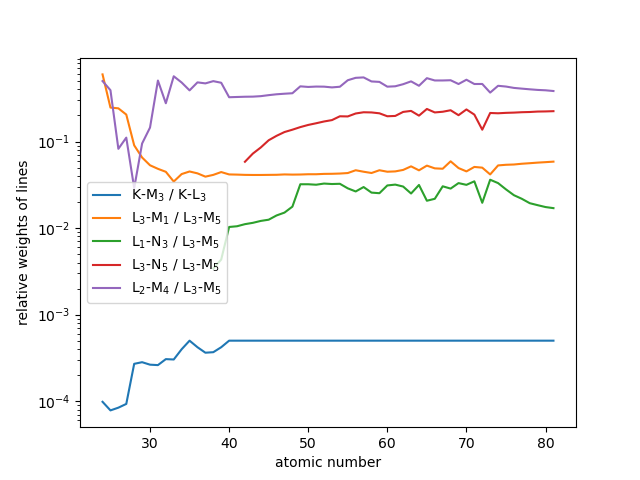

In [15]:
K_M5 = []
ele_K_M5 = []
L3_M1 = []
ele_M3_M1 = []
L1_N3 = []
ele_L1_N3 = []
L3_N5 =[]
ele_L3_N5 = []
L2_M4 = []
ele_L2_M4 = []
for element in range(5,82):
    if 'K-M5' in x_sections[str(element)]['lines']:
        K_M5.append(x_sections[str(element)]['lines']['K-M5']['weight']/x_sections[str(element)]['lines']['K-L3']['weight'])
        ele_K_M5.append(element)
    if 'L3-M5' in x_sections[str(element)]['lines']:
    
        if 'L3-M1' in x_sections[str(element)]['lines']:
            L3_M1.append(x_sections[str(element)]['lines']['L3-M1']['weight']/x_sections[str(element)]['lines']['L3-M5']['weight'])
            ele_M3_M1.append(element)
        
        if 'L1-N3' in x_sections[str(element)]['lines']:
            L1_N3.append(x_sections[str(element)]['lines']['L1-N3']['weight']/x_sections[str(element)]['lines']['L3-M5']['weight'])
            ele_L1_N3.append(element)
        
        if 'L3-N5' in x_sections[str(element)]['lines']:
            L3_N5.append(x_sections[str(element)]['lines']['L3-N5']['weight']/x_sections[str(element)]['lines']['L3-M5']['weight'])
            ele_L3_N5.append(element)
        
        if 'L2-M4' in x_sections[str(element)]['lines']:
            L2_M4.append(x_sections[str(element)]['lines']['L2-M4']['weight']/x_sections[str(element)]['lines']['L3-M5']['weight'])
            ele_L2_M4.append(element)
    
ele = np.linspace(1,94,94)

plt.figure()
plt.plot(ele_K_M5 ,K_M5, label = 'K-M$_3$ / K-L$_3$')
plt.plot(ele_M3_M1,L3_M1, label = 'L$_3$-M$_1$ / L$_3$-M$_5$')
plt.plot(ele_L1_N3,L1_N3, label = 'L$_1$-N$_3$ / L$_3$-M$_5$')
plt.plot(ele_L3_N5,L3_N5, label = 'L$_3$-N$_5$ / L$_3$-M$_5$')
plt.plot(ele_L2_M4,L2_M4, label = 'L$_2$-M$_4$ / L$_3$-M$_5$')
plt.ylabel('')
plt.gca().set_yscale('log')
plt.xlabel('atomic number')
plt.ylabel('relative weights of lines')

plt.legend();

### Characteristic X-ray Intensity

The cross section $Q_I$ (probability of excitation expressed as area) of an isolated atom ejecting an electron bound with energy $E_c$ (keV) by an electron with energy $E$ (keV) is:

$$Q_I \left(\frac{ionizations}{e^- (atoms/cm^2)} \right) =  6.51 \times 10^{-20} \left[ \frac{n_s b_s}{E E_c}\right]\log_e (c_s E / E_c) $$

where:
- $n_s$: number of electrons in shell or subshell $s$
- $b_s$, $c_s$: constants for a given shell $s$
- $E$: energy of the exciting electron
- $E_𝑐$: Critical ionization energy

For example for a K shell (Powell 1979): $n_K = 2$, $b_K = 0.35$, and $c_k = 1$

For silion the characteristic energy or binding energy for the K shell: $E_c = 1.838$ keV

The relationship between energy of the exciting electron and critical energy is important and is expressed as **overvoltage** $U$:
$$U =\frac{E}{E_c}$$



The overvoltage of the primary electron with energy $E_0$ is expressed as:
$$ U_0 =\frac{E_0}{E_c}$$

We can express the cross section with the overvoltage:

$$Q_I  =  6.51 \times 10^{-20} \left[ \frac{n_s b_s}{U E_c^2}\right]\log_e (c_s U) $$



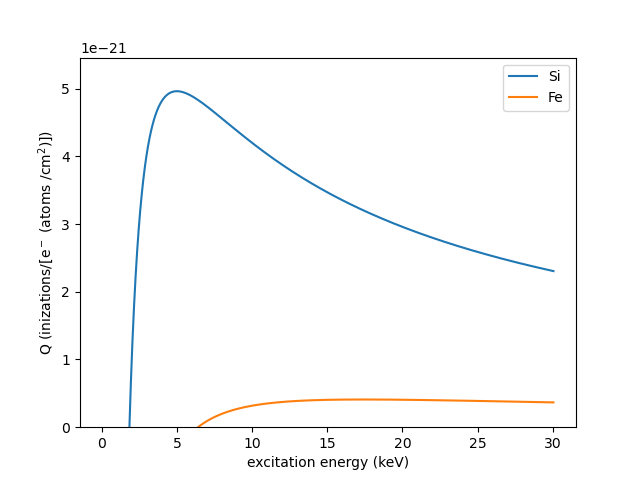

In [16]:
n_K = 2.0
b_K = 0.35
c_K = 1.0

# Silicon
E_c_Si = 1.838 
# Iron
E_c_Fe = 6.401

E = np.linspace(0,30,2048)+0.05
U = E/E_c_Si

Q_Si = 6.51*1e-20*n_K*b_K/(U * E_c_Si**2)* np.log(c_K * U)
U = E/E_c_Fe
Q_Fe = 6.51*1e-20*n_K*b_K/(U * E_c_Fe**2)* np.log(c_K * U)
plt.figure()
plt.plot(E,Q_Si, label ='Si')
plt.plot(E,Q_Fe, label ='Fe')

plt.ylim(0.,Q_Si.max()*1.1)
plt.xlabel('excitation energy (keV)')
plt.ylabel('Q (inizations/[e$^-$ (atoms /cm$^2$)])')
plt.legend();

### X-ray Production in a Thick Solid Sample

If the sample is sufficient thick so that all electrons interact ( several micrometers) the X-ray intensity is found to follow an expression fo the form:

$$I \approx i_p \left[ (E_0-E_c)/E_0\right]^n \approx i_p [U_0-1]^n$$

where:
- $i_p$: beam current 
- $n$: exponent $n$ depends on particular element and shell (Lifshin et al. 1980) 

The exponent $n$ is ususally between 1.5 and 2. See what changes in the plot below if you change this exponent.

### X-ray Production in a Thin Foil

Now we have all the ingeedients to look at the total generation of X-rays.

The number of photons $n_X$ produced in a thin foil of thickness $t$ is :
$$ n_x  = Q_I(E) \ \omega   N_A  \frac{1}{A} \rho \ t $$

- $n_X$ [photons/e$^-$]
- $Q_I(E)$ [ ionizations/e$^-$ (atoms / cm$^2$)): ionization cross section
- $\omega$ [X-rays/ ionization]: fluorescent yield = number of X-rays generated per ionization
- $ N_A$  [atoms per mol]: Avogadro’s number 
- $A$ [g/moles]: atomic weight
- $\rho$ [g/cm$^3$]: density of sample
- $t$ [cm]: thickness of sample

The number of X-rays increase linearly with the number of atoms per unit area ($N_A  \frac{1}{A} \rho \ t $).


### Origin of Line Width

Electron hole pairs are created with a standard deviation corresponding to the quantum mechanical shot-noise (Poisson statistic).
The distribution is then a Gaussian with the width of the standard deviation $\sigma$.

For the Mn K-L2,3 peak< this width would be 40 electron hole pairs.
The full width at half maximum (FWHM) of the Mn K-L2,3 edge would then be (FWHM of Gaussian  is 2.35 * 𝜎) about 106 eV a major component of the observed 125 eV in good EDS systems.


###  Line Width Estimate
Fiori and Newbury 1978
From a reference peak at $E_{ref}$  and the measured FWHM of the peak $FWHM_{ref}$ in eV, we can estimate the peak width of the other peaks

$$ FWHM =  \sqrt{2.5 \times (E-E_{ref}) + FWHM_{ref}^2 }$$ 

Gernerally we use the Mn K-L2,3 peak $E_{ref}$ = 5895 eV as a reference. In our spectrometer we got for the setup above: $FWHM_{ref} = 136$ eV

In [18]:
def getPeak(E, energy_scale):
    E_ref = 5895.0
    FWHM_ref = 136 #eV
    FWHM  = np.sqrt(2.5*(E*1e3-E_ref)+FWHM_ref**2)*1e-3
    return gaussian(energy_scale, E, FWHM)


new_energy_scale = energy_scale
E= .275 
C_peak = getPeak(E,new_energy_scale)

E = 2.019
P_peak = getPeak(E,new_energy_scale)
E = 1.258
Al_peak = getPeak(E,new_energy_scale)
E = 0.528
O_peak = getPeak(E,new_energy_scale)
plt.figure()

plt.plot(new_energy_scale,C_peak*8233, label = 'C')
plt.plot(new_energy_scale,P_peak*8000, label = 'P')
plt.plot(new_energy_scale,Al_peak*4600, label = 'Al')

plt.plot(new_energy_scale,O_peak*4600, label = 'O')
plt.legend()


NameError: name 'gaussian' is not defined

## Summary
Now we have all the ingredients of the X-Ray spectrum.

- Background with thickness dependence and detector response
- Position and width of characteristic X-ray peaks.
